In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  

from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score


In [2]:
human_data = pd.read_table('human.txt')
human_data.head()

,sequence,class
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3


In [3]:
human_data.columns

Index(['sequence', 'class'], dtype='object')

In [4]:
human_data.shape

(4380, 2)

In [5]:
human_data.isnull().sum()

sequence    0
class       0
dtype: int64

In [6]:
human_data['class'].value_counts().sort_index(ascending= False)

class
6    1343
5     240
4     711
3     672
2     349
1     534
0     531
Name: count, dtype: int64

##### Whenever working with DNA sequencing, basically convert DNA Sequences as languages. In order to convert those into languages we basically use this technique called " k-mer counting".
#### By using K-mer counting make a fixed  set of count variable.
##### We basically trying to form a fixed vector, the vector of uniform length ,considering six hexamers , any long my DNA sequence is will be converting that into six set of six length, this will be converted into a vectors by NLP( vectors using NLP).  

#### The function is defined with two parameters:
##### • sequence: This is a string representing the DNA sequence from which we want to extract hexamers.
##### • k: This is an integer representing the length of the k-mers we want to generate. In this case, it will be 6 for hexamers.


In [7]:
# Define k for hexamers
k = 6

# Function to generate hexamers
def generate_hexamer(sequence, k):
    return [sequence[i:i+k].lower() for i in range(len(sequence) - k + 1)] #Len(sequence) gives the total length of the sequence.

'''Example: For the sequence "ATGCATGCA", the hexamers extracted would be:

'ATGCAT'
'TGCATG'
'GCATGC'
'CATGCA'

In [8]:
# Apply k-mer generation to each sequence in the DataFrame
human_data['hexamer'] = human_data['sequence'].apply(lambda x:' '.join(generate_hexamer(x, k)))
# For each sequence in dataset, this function is applied, creating a new column called 'hexamers' that contains all 
# the hexamer combinations joined by spaces.

In [9]:
# Show the new hexamers column (for checking purposes)
human_data.head(5)

,sequence,class,hexamer
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4,atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4,atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3,ATGTGTGGCATTTGGGCGCTGTTTGGCAGTGATGATTGCCTTTCTG...,3,atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4,ATGCAACAGCATTTTGAATTTGAATACCAGACCAAAGTGGATGGTG...,3,atgcaa tgcaac gcaaca caacag aacagc acagca cagc...


 ### Joining Hexamers into a Single String
#### ' '.join(...):- The join() function is used to take the list of hexamers and join them into a single string where each hexamer is separated by a space.
#### If the hexamers list is ["ATGCAT", "TGCATG", "GCATGC", "CATGCA"], then ' '.join(...) will convert it into the string:
#### "ATGCAT TGCATG GCATGC CATGCA"



In [10]:
human_data = human_data.drop('sequence', axis=1)
human_data.tail(5)

,class,hexamer
4375,0,atggaa tggaag ggaaga gaagat aagatt agattt gatt...
4376,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4377,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4378,6,atgggg tggggc ggggca gggcac ggcacc gcacct cacc...
4379,6,atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...


In [11]:
# Split the dataset into features (X) and target (y)
X = human_data['hexamer']   # Feature (hexamer strings or k-mer vectors)
y = human_data['class']     # Target (class labels)

In [12]:
y.sample(4)

1408    1
1357    4
1493    1
1904    4
Name: class, dtype: int64

<Axes: title={'center': 'Class Distribution'}, xlabel='class', ylabel='Count'>

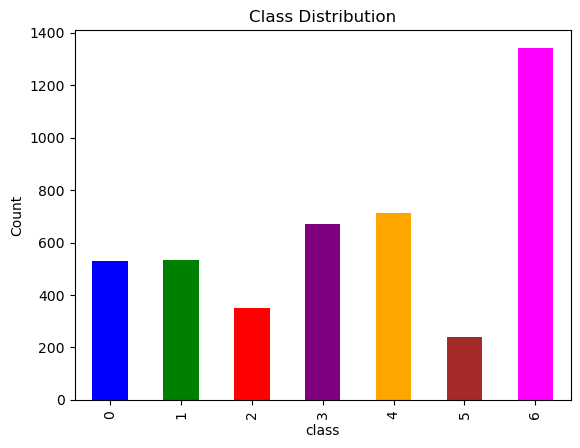

In [13]:
# To Visualize Class Distribution Use a bar plot to show the counts of each class.
colors = ['blue', 'green', 'red', 'purple', 'orange', 'brown', 'magenta']
plt.title('Class Distribution')
plt.xlabel('Class')               # Label for x-axis
plt.ylabel('Count') 
human_data['class'].value_counts().sort_index().plot.bar(color=colors)



### Split the Data into Training and Test Sets
Now that the data is ready, we will split it into training and test sets.

In [14]:
# Split into training and test sets (80% training, 20% testing)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Training samples: {len(X_train)}, Test samples: {len(X_test)}")

Training samples: 3504, Test samples: 876


In [15]:
# Create a pipeline with CountVectorizer and SVM
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(ngram_range=(4, 6))),  # Using 4-6 n-grams
    ('svm', SVC(kernel='linear'))  # SVM classifier
])
pipeline

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(4, 6))),
                ('svm', SVC(kernel='linear'))])

In [16]:
# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer(ngram_range=(4, 6))),
                ('svm', SVC(kernel='linear'))])

In [17]:
# Make predictions on the test data
y_pred = pipeline.predict(X_test)

In [18]:
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8973


### Evaluate Model Performance

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

# Generate confusion matrix

cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

# Generate classification report

cr = classification_report(y_test, y_pred)
print("Classification Report:\n", cr)

# Generate accuracy, precision, recall, and F1-score
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Confusion Matrix:
 [[ 85   0   0   0   1   0  16]
 [  0  90   0   5   0   0  11]
 [  0   0  67   0   0   0  11]
 [  0   0   0 115   0   0  10]
 [  0   0   0   2 122   0  25]
 [  0   0   0   0   0  42   9]
 [  0   0   0   0   0   0 265]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.83      0.91       102
           1       1.00      0.85      0.92       106
           2       1.00      0.86      0.92        78
           3       0.94      0.92      0.93       125
           4       0.99      0.82      0.90       149
           5       1.00      0.82      0.90        51
           6       0.76      1.00      0.87       265

    accuracy                           0.90       876
   macro avg       0.96      0.87      0.91       876
weighted avg       0.92      0.90      0.90       876

Accuracy: 0.8973
Precision: 0.9189
Recall: 0.8973
F1-Score: 0.8993
